In [1]:
from tensorflow.keras.layers import Dropout, Conv1D, Embedding, MaxPooling1D, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 테스트셋 지정.
(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words= 5000)

x_train= sequence.pad_sequences(x_train, maxlen= 500)
x_test= sequence.pad_sequences(x_test, maxlen= 500)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# 모델의 구조를 설정.
model= Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(.5))
model.add(Conv1D(64, 5, padding= 'valid', activation= 'relu', strides= 1))
model.add(MaxPooling1D(pool_size= 4))
model.add(LSTM(55))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

LSTM과 CNN의 조합을 이용해 영화 리뷰 분석

Epoch 1/100
469/469 [==============================] - 17s 13ms/step - loss: 0.4053 - accuracy: 0.8043 - val_loss: 0.2716 - val_accuracy: 0.8888
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2358 - accuracy: 0.9055 - val_loss: 0.2764 - val_accuracy: 0.8896
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1860 - accuracy: 0.9295 - val_loss: 0.2739 - val_accuracy: 0.8931
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3097 - accuracy: 0.8795

 Test Accuracy: 0.8795


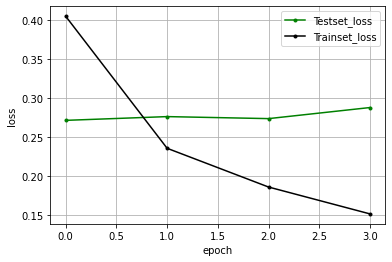

In [4]:
# 데이터를 불러와 학습셋과 테스트셋으로 분활.
(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words= 5000)

# 단어의 수 지정.
x_train= sequence.pad_sequences(x_train, maxlen= 500)
x_test= sequence.pad_sequences(x_test, maxlen= 500)

# 모델의 구조 설정.
model= Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(.5))
model.add(Conv1D(64, 5, padding= 'valid', activation= 'relu', strides= 1))
model.add(MaxPooling1D(pool_size= 4))
model.add(LSTM(55))
model.add(Dense(1, activation= 'sigmoid'))

# 모델의 실행 옵션 설정.
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# 학습의 조기 중단 설정.
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 3)

# 모델 실행.
history= model.fit(x_train, y_train, batch_size= 40, epochs= 100,
                   validation_split= .25, callbacks= [early_stopping_callback])

# 테스트 정확도 출력.
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

# 검증셋과 학습셋이 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프 구현.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'green', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'black', label= 'Trainset_loss')

# 그래프에 그리드 추가, 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()